In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('Dataset/germany/tes_jerman.csv')
dataset

,HomeTeam,AwayTeam,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,FTR
0,Bayern Munich,Hoffenheim,16,8,5,5,7,2,2,21,1,4,0,0,1,0,H
1,Fortuna Dusseldorf,Augsburg,9,14,5,7,7,5,11,10,1,0,0,0,1,0,A
2,Freiburg,Ein Frankfurt,22,10,6,2,6,4,7,12,1,2,0,0,0,1,A
3,Hertha,Nurnberg,10,12,3,3,8,4,13,10,2,2,0,0,1,0,H
4,M'gladbach,Leverkusen,17,13,7,3,9,5,10,10,1,2,0,0,0,0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,Heidenheim,Karlsruhe,15,12,6,4,0,8,6,4,1,1,0,0,2,0,H
2444,Nurnberg,Schalke 04,17,12,5,6,10,3,8,17,1,1,0,0,0,1,A
2445,Sandhausen,Holstein Kiel,16,11,7,3,3,3,12,6,3,1,0,0,3,0,H
2446,St Pauli,Fortuna Dusseldorf,15,9,5,5,7,5,11,17,2,2,0,0,0,0,H


In [3]:
le=LabelEncoder()
dataset['HomeTeam']=le.fit_transform(dataset['HomeTeam'])
dataset['AwayTeam']=le.fit_transform(dataset['AwayTeam'])
dataset['FTR']=le.fit_transform(dataset['FTR'])

In [4]:
dataset

,HomeTeam,AwayTeam,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,FTR
0,1,20,16,8,5,5,7,2,2,21,1,4,0,0,1,0,2
1,12,0,9,14,5,7,7,5,11,10,1,0,0,0,1,0,0
2,13,9,22,10,6,2,6,4,7,12,1,2,0,0,0,1,0
3,19,28,10,12,3,3,8,4,13,10,2,2,0,0,1,0,2
4,25,24,17,13,7,3,9,5,10,10,1,2,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,18,23,15,12,6,4,0,8,6,4,1,1,0,0,2,0,2
2444,28,34,17,12,5,6,10,3,8,17,1,1,0,0,0,1,0
2445,33,21,16,11,7,3,3,3,12,6,3,1,0,0,3,0,2
2446,35,12,15,9,5,5,7,5,11,17,2,2,0,0,0,0,2


In [5]:
X = dataset[dataset.columns[0:16]]
Y = dataset['FTR']

In [6]:
 # membagi dataset menjadi training dan testing 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [24]:
y_test.value_counts()

2    214
0    164
1    112
Name: FTR, dtype: int64

In [23]:
y_train.value_counts()

2    832
0    599
1    527
Name: FTR, dtype: int64

In [7]:
grGermany = xgb.XGBClassifier(random_state=10)
grGermany.fit(X_train, y_train)
grGermany_pred = grGermany.predict(X_test)
print("pred", grGermany_pred)  #hasil prediksi 
print("tes", y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, grGermany_pred)*100)

pred [1 0 2 0 0 0 0 0 0 0 1 2 2 0 2 0 2 0 0 0 2 2 0 2 2 2 2 2 0 1 0 1 0 2 2 2 1
 1 1 1 1 2 0 1 2 0 2 1 2 0 0 2 1 2 2 0 1 2 2 2 0 0 2 2 1 2 0 2 2 1 2 0 1 1
 2 2 0 2 2 1 2 2 0 2 0 1 1 2 2 0 1 0 2 2 1 1 2 0 2 2 0 0 0 2 1 0 0 0 2 0 2
 2 2 0 1 0 0 2 2 0 1 0 1 0 2 2 1 0 0 2 0 2 2 0 2 2 2 2 0 2 0 2 1 0 2 0 0 2
 2 1 1 0 2 2 2 2 1 2 0 1 2 2 2 1 0 2 2 2 0 2 2 2 0 1 2 0 2 1 2 1 0 0 2 1 1
 2 0 2 2 2 0 0 1 0 1 0 2 0 2 1 2 2 1 1 2 2 2 0 2 2 0 1 0 1 2 1 0 2 2 1 2 1
 0 1 1 2 1 0 2 1 0 2 0 1 1 2 2 2 0 2 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 0 2 0 2
 0 0 1 0 2 2 1 0 1 0 0 0 1 0 2 0 2 2 2 1 1 1 0 2 2 1 2 2 2 2 0 2 0 0 1 2 2
 0 0 2 1 0 2 1 0 2 1 2 1 0 1 2 0 1 2 0 1 1 2 2 2 1 0 2 0 2 1 1 1 1 0 2 2 1
 0 0 2 0 1 1 1 2 0 1 0 2 0 2 2 2 1 0 0 2 0 1 0 0 0 2 2 2 1 2 2 0 1 2 0 1 2
 2 0 1 0 2 2 2 2 2 1 2 0 0 2 1 2 1 2 1 2 1 1 2 0 2 0 2 0 1 2 2 0 1 1 0 2 1
 0 2 2 2 0 2 2 1 2 2 0 1 2 2 1 0 2 0 1 2 2 2 0 2 2 0 1 0 2 2 2 2 2 1 1 1 1
 0 0 0 0 1 2 2 2 2 2 0 0 0 2 1 0 0 0 1 0 1 0 0 2 2 2 0 2 2 1 0 0 1 2 0 2 0
 0 2 2 2 2 2 1 2 2]


In [8]:
print(classification_report(y_test,grGermany_pred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       164
           1       0.37      0.38      0.38       112
           2       0.71      0.72      0.72       214

    accuracy                           0.62       490
   macro avg       0.58      0.58      0.58       490
weighted avg       0.62      0.62      0.62       490



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, grGermany_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, grGermany_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, grGermany_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, grGermany_pred, average=None)

print("XGBoost")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

XGBoost
Akurasi: 0.6163265306122448
Presisi: [0.66455696 0.37068966 0.71296296]
Recall: [0.6402439  0.38392857 0.71962617]
F1-score: [0.65217391 0.37719298 0.71627907]


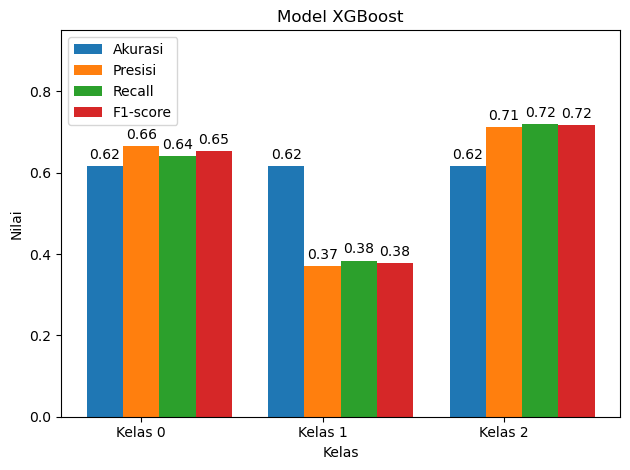

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.6163265306122448
precision = [0.66455696, 0.37068966, 0.71296296]
recall = [0.6402439, 0.38392857, 0.71962617]
f1 = [0.65217391, 0.37719298, 0.71627907]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model XGBoost')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 0.95])
plt.tight_layout()
plt.show()

In [11]:
lgbGermany = lgb.LGBMClassifier(random_state=10)
lgbGermany.fit(X_train, y_train)
lgbGermany_pred = lgbGermany.predict(X_test)
print(lgbGermany_pred)  #hasil prediksi 
print(y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, lgbGermany_pred)*100)

[1 0 2 0 0 0 0 2 0 0 0 2 2 0 2 0 2 2 0 0 2 2 0 2 2 2 2 2 0 2 0 1 0 2 2 2 1
 1 1 1 1 2 0 1 2 0 2 1 2 0 2 2 1 2 2 0 2 2 2 2 1 0 2 2 1 2 0 2 2 1 2 0 1 1
 2 2 1 2 2 1 2 2 1 2 2 1 2 2 2 1 1 0 2 2 1 1 2 0 2 2 0 0 2 2 2 0 0 0 2 0 2
 0 2 0 1 0 0 2 2 0 1 0 2 0 2 2 1 0 1 2 0 2 2 0 2 2 2 2 0 2 0 2 1 0 1 0 0 2
 2 1 1 0 2 2 2 2 1 1 0 1 2 0 2 0 0 2 2 2 1 2 2 2 0 1 1 0 2 1 2 1 1 0 2 2 1
 2 0 2 2 2 0 0 0 0 1 0 2 0 2 1 2 2 1 1 2 2 2 0 2 2 0 1 0 1 1 0 0 2 2 1 2 1
 0 1 1 2 1 0 2 1 0 2 0 1 1 2 2 2 0 2 2 2 0 1 0 0 0 2 2 1 0 2 1 2 0 0 2 0 2
 1 0 1 2 2 2 2 0 1 0 0 0 1 0 2 0 2 2 2 1 1 1 0 2 2 1 2 2 0 2 0 2 0 0 2 0 1
 0 0 2 1 0 2 1 0 2 1 1 1 0 1 2 0 1 2 0 1 1 2 1 2 2 0 2 0 1 1 1 1 0 0 1 2 2
 0 0 2 0 1 1 1 2 0 1 0 2 0 2 1 2 1 0 0 2 0 1 0 0 0 1 2 2 1 2 2 0 0 2 0 1 2
 2 0 2 0 2 2 2 0 2 1 2 0 0 2 1 1 1 0 1 2 1 1 2 0 1 1 2 0 1 2 2 1 2 1 0 2 1
 0 2 2 2 0 2 2 2 2 2 1 1 2 2 1 0 2 0 2 2 0 1 0 2 2 0 1 0 2 2 2 2 2 1 1 1 0
 0 0 0 0 1 2 2 2 2 2 0 0 0 2 1 0 1 0 1 0 2 0 0 2 2 2 0 1 2 1 0 0 1 0 0 2 0
 1 2 2 2 2 0 1 2 2]
464  

In [12]:
print(classification_report(y_test,lgbGermany_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       164
           1       0.33      0.37      0.35       112
           2       0.69      0.68      0.69       214

    accuracy                           0.59       490
   macro avg       0.56      0.56      0.56       490
weighted avg       0.60      0.59      0.59       490



In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, lgbGermany_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, lgbGermany_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, lgbGermany_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, lgbGermany_pred, average=None)

print("LightGBM")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

LightGBM
Akurasi: 0.5897959183673469
Presisi: [0.65806452 0.33333333 0.68867925]
Recall: [0.62195122 0.36607143 0.68224299]
F1-score: [0.63949843 0.34893617 0.68544601]


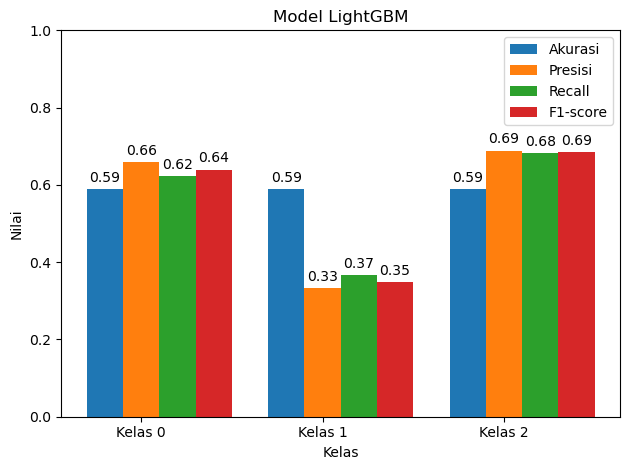

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.5897959183673469
precision = [0.65806452, 0.33333333, 0.68867925]
recall = [0.62195122, 0.36607143, 0.68224299]
f1 = [0.63949843, 0.34893617, 0.68544601]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model LightGBM')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

In [15]:
abGermany = AdaBoostClassifier(random_state=10, learning_rate=0.20)
abGermany.fit(X_train, y_train)
abGermany_pred = abGermany.predict(X_test)
print(abGermany_pred)  #hasil prediksi 
print(y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, abGermany_pred)*100)

[0 0 2 0 0 0 0 1 0 0 1 2 2 0 2 0 2 1 0 0 2 2 0 2 2 2 2 2 0 2 0 0 0 2 2 2 2
 2 2 0 2 2 0 1 2 0 2 1 1 0 2 2 0 2 2 0 2 1 2 2 0 0 2 2 1 2 0 2 2 0 2 0 1 1
 2 2 2 2 2 1 2 2 1 2 1 1 2 2 2 0 0 0 2 2 2 2 2 0 2 2 0 0 0 0 2 1 0 2 2 0 2
 0 2 0 2 0 0 2 2 2 1 0 0 0 2 2 1 0 2 2 0 2 2 0 2 2 2 2 0 2 0 2 1 0 2 0 0 2
 2 0 2 0 2 2 2 2 0 2 0 1 2 2 2 1 0 2 2 2 1 2 2 2 0 2 2 0 2 1 1 1 1 0 0 0 2
 2 0 2 2 2 0 0 1 0 1 0 2 0 2 1 2 2 0 1 2 2 2 0 2 2 0 1 2 1 1 0 0 2 2 1 2 1
 0 2 1 2 0 1 2 1 0 2 0 1 1 2 2 2 2 2 2 2 0 2 0 0 0 2 2 1 0 2 2 2 0 0 2 0 0
 1 2 1 1 2 2 1 0 2 0 1 1 1 0 2 1 2 2 2 1 2 1 0 0 2 1 2 0 0 2 0 2 0 0 2 0 2
 0 1 2 2 0 2 2 0 1 2 2 0 0 2 2 0 2 2 0 0 0 2 2 2 1 0 2 0 0 2 0 1 1 0 1 2 2
 0 0 2 0 1 2 2 2 0 2 2 2 0 0 2 2 2 0 0 2 0 1 0 0 0 2 2 2 1 2 2 0 0 2 0 2 2
 2 0 2 0 2 2 2 0 0 1 2 0 0 2 0 2 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 2 2 0 2 1
 0 0 2 2 0 2 2 2 2 1 0 2 2 2 1 0 2 0 1 2 1 2 0 2 2 0 2 0 2 2 2 2 2 0 1 2 1
 0 0 0 0 1 1 2 0 2 2 0 0 0 2 1 0 1 0 1 0 2 0 0 2 2 2 0 1 2 1 2 0 1 2 0 2 0
 0 2 2 2 2 2 1 2 2]
464  

In [16]:
print(classification_report(y_test,abGermany_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       164
           1       0.38      0.28      0.32       112
           2       0.72      0.81      0.77       214

    accuracy                           0.64       490
   macro avg       0.59      0.59      0.58       490
weighted avg       0.62      0.64      0.63       490



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, abGermany_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, abGermany_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, abGermany_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, abGermany_pred, average=None)

print("AdaBoost")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

AdaBoost
Akurasi: 0.6428571428571429
Presisi: [0.6547619  0.37804878 0.725     ]
Recall: [0.67073171 0.27678571 0.81308411]
F1-score: [0.6626506  0.31958763 0.76651982]


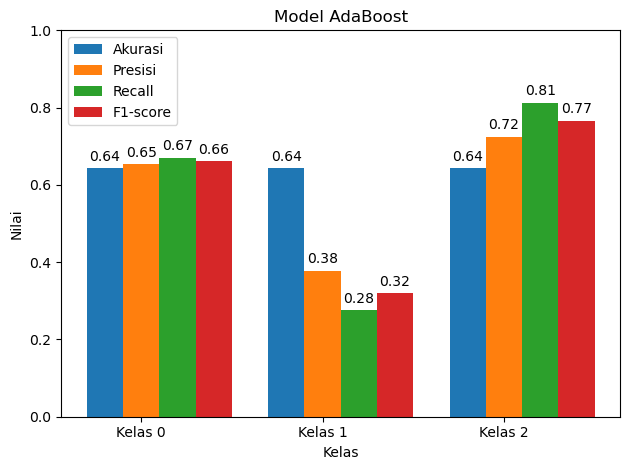

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.6428571428571429
precision = [0.6547619, 0.37804878, 0.725]
recall = [0.67073171, 0.27678571, 0.81308411]
f1 = [0.6626506, 0.31958763, 0.76651982]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model AdaBoost')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

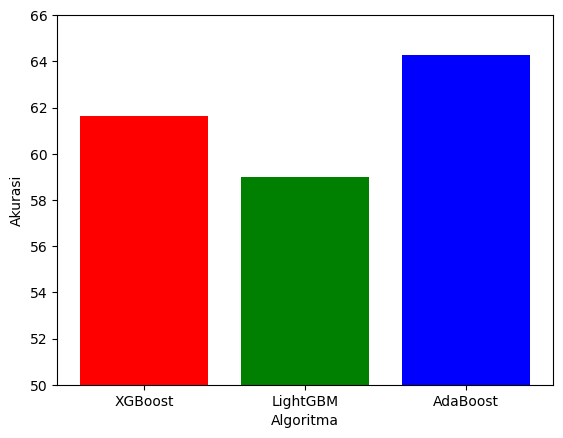

In [19]:
import matplotlib.pyplot as plt

# Data hasil akurasi algoritma
algoritma = ['XGBoost', 'LightGBM', 'AdaBoost']
akurasi = [61.63265306122449, 58.97959183673469, 64.28571428571429]

# Warna untuk setiap batang
colors = ['red', 'green', 'blue']

# Membuat diagram batang dengan warna yang ditentukan
plt.bar(algoritma, akurasi, color=colors)

# Memberikan judul dan label sumbu
#plt.title('Hasil Akurasi Dengan Data Liga Spanyol')
plt.xlabel('Algoritma')
plt.ylabel('Akurasi')

# Mengatur batas sumbu y pada rentang 0 hingga 100
plt.ylim(50, 66)

# Menampilkan diagram batang
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix

print("Model XGBoost\n", confusion_matrix(y_test, grGermany_pred))
print("\n")
print("Model LightGBM\n", confusion_matrix(y_test, lgbGermany_pred))
print("\n")
print("Model AdaBoost\n", confusion_matrix(y_test, abGermany_pred))

Model XGBoost
 [[105  33  26]
 [ 33  43  36]
 [ 20  40 154]]


Model LightGBM
 [[102  38  24]
 [ 29  41  42]
 [ 24  44 146]]


Model AdaBoost
 [[110  30  24]
 [ 39  31  42]
 [ 19  21 174]]


Menyimpan Model

In [21]:
import pickle

In [22]:
filename = 'germany.sav'
pickle.dump(abGermany, open(filename, 'wb'))